In [1]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [2]:
auth_url = "https://www.strava.com/oauth/token"
activites_url = "https://www.strava.com/api/v3/athlete/activities"

# Replaced variables with my account. In the future, I would like to replace with users accounts.
payload = {
    'client_id': "*****",
    'client_secret': '*****',
    'refresh_token': '*****',
    'grant_type': "refresh_token",
    'f': 'json'
}

In [3]:
print("Requesting Token...\n")
res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))


Requesting Token...

Access Token = 710ab34cfb0e595241363d1458fe375f0a566071



In [4]:
header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 200, 'page': 1}
my_dataset = requests.get(activites_url, headers=header, params=param).json()


In [5]:
import pandas as pd
from pandas.io.json import json_normalize

In [6]:
activities = json_normalize(my_dataset)

C:\Users\ericf\AppData\Local\Temp/ipykernel_16588/1314770303.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  activities = json_normalize(my_dataset)


In [7]:
#Create new dataframe with relevant columns
cols = ['name', 'upload_id','type','distance','moving_time','average_speed', 'max_speed','total_elevation_gain','start_date_local']

activities = activities[cols]

# Breaks date into start time and date
activities['start_date_local'] = pd.to_datetime(activities['start_date_local'])
activities['start_time'] = activities['start_date_local'].dt.time
activities['start_date_local'] = activities['start_date_local'].dt.date


In [8]:
activities.head()

,name,upload_id,type,distance,moving_time,average_speed,max_speed,total_elevation_gain,start_date_local,start_time
0,Afternoon Run,6.953780e+09,Run,8049.2,3035,2.652,3.118,0.0,2022-01-17,14:05:18
1,Afternoon Run,6.949353e+09,Run,6538.7,2565,2.549,2.836,0.0,2022-01-16,14:18:48
2,Evening Run,6.943460e+09,Run,5436.0,1975,2.752,3.044,0.0,2022-01-15,19:23:41
3,Lunch Run,6.931727e+09,Run,10336.0,3430,3.013,4.740,52.4,2022-01-13,12:09:17
4,75 degrees😵‍💫,6.919910e+09,Run,7338.0,2245,3.269,5.103,41.8,2022-01-11,09:50:04


In [9]:
runs = activities.loc[activities['type'] == 'Run']

In [10]:
runs.head()

,name,upload_id,type,distance,moving_time,average_speed,max_speed,total_elevation_gain,start_date_local,start_time
0,Afternoon Run,6.953780e+09,Run,8049.2,3035,2.652,3.118,0.0,2022-01-17,14:05:18
1,Afternoon Run,6.949353e+09,Run,6538.7,2565,2.549,2.836,0.0,2022-01-16,14:18:48
2,Evening Run,6.943460e+09,Run,5436.0,1975,2.752,3.044,0.0,2022-01-15,19:23:41
3,Lunch Run,6.931727e+09,Run,10336.0,3430,3.013,4.740,52.4,2022-01-13,12:09:17
4,75 degrees😵‍💫,6.919910e+09,Run,7338.0,2245,3.269,5.103,41.8,2022-01-11,09:50:04


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

C:\Users\ericf\AppData\Local\Temp/ipykernel_16588/931691573.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


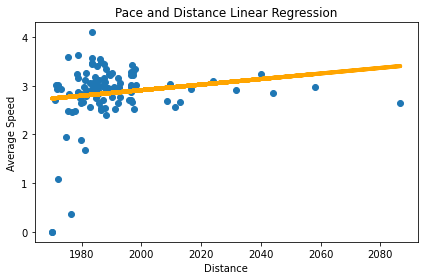

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.asarray(runs.distance)
y = np.asarray(runs.average_speed)

# Create linear regression object
pace_distance = linear_model.LinearRegression()

# Train the model using the training sets
pace_distance.fit(x.reshape(-1,1),y)

# Get the regression line using the model
regression_line = pace_distance.predict(x.reshape(-1,1))

# Making predictions

# Plot outputs and plot customization
ax.plot_date(x,y)
plt.plot(x,regression_line,label='Best Fit Line', color = 'orange',linewidth=4)
plt.title('Pace and Distance Linear Regression')
plt.xlabel('Distance')
plt.ylabel('Average Speed')
fig.tight_layout()
fig.show()

In [13]:
average_speed_all = round(60/(runs['average_speed'].mean() * 2.237), 2)
max_speed_all = round(60/(runs['max_speed'].mean() * 2.237), 2)

print(f"My average speed is {average_speed_all} minutes per mile, whereas my average max speed is {max_speed_all} minutes per mile")

My average speed is 9.4 minutes per mile, whereas my average max speed is 5.81 minutes per mile


In [14]:
activities.head(105)

,name,upload_id,type,distance,moving_time,average_speed,max_speed,total_elevation_gain,start_date_local,start_time
0,Afternoon Run,6.953780e+09,Run,8049.2,3035,2.652,3.118,0.0,2022-01-17,14:05:18
1,Afternoon Run,6.949353e+09,Run,6538.7,2565,2.549,2.836,0.0,2022-01-16,14:18:48
2,Evening Run,6.943460e+09,Run,5436.0,1975,2.752,3.044,0.0,2022-01-15,19:23:41
3,Lunch Run,6.931727e+09,Run,10336.0,3430,3.013,4.740,52.4,2022-01-13,12:09:17
4,75 degrees😵‍💫,6.919910e+09,Run,7338.0,2245,3.269,5.103,41.8,2022-01-11,09:50:04
...,...,...,...,...,...,...,...,...,...,...
100,Morning Run,6.199329e+09,Run,14116.7,5245,2.691,4.700,133.1,2021-08-21,06:56:51
101,Night Swim,6.195648e+09,Swim,475.0,959,0.495,2.000,0.0,2021-08-20,21:42:24
102,Morning Run,6.187226e+09,Run,5394.8,1728,3.122,4.500,28.8,2021-08-19,06:32:42
103,Night Run,6.186953e+09,Run,0.0,3682,0.000,0.000,0.0,2021-08-18,21:39:34


In [15]:
runs = runs.sort_values(by="start_date_local")

In [16]:
runs.head()

,name,upload_id,type,distance,moving_time,average_speed,max_speed,total_elevation_gain,start_date_local,start_time
199,Woodward 1,2.351583e+09,Run,5730.5,2163,2.649,3.4,17.7,2019-03-11,15:53:09
198,Lunch Run,2.365503e+09,Run,6044.0,2368,2.552,4.6,21.8,2019-03-17,11:36:33
197,Lunch Run,2.422307e+09,Run,6537.8,2118,3.087,5.7,23.4,2019-04-08,12:52:31
196,Afternoon Run,2.427794e+09,Run,4846.9,1406,3.447,6.9,23.1,2019-04-10,16:57:34
195,Morning Run,2.509938e+09,Run,4860.0,1402,3.466,7.6,22.8,2019-05-11,10:00:42


In [17]:
from datetime import datetime

In [27]:
# I started training 2021-05-01 so I removed dates prior 
train_date = '2021-05-01'
train_date = datetime.strptime(train_date, '%Y-%m-%d').date()
runs['start_date_local'] = pd.to_datetime(runs['start_date_local']).dt.date
runs['train'] = np.where(runs['start_date_local'] > train_date, 'true','false')

In [19]:
train = runs.loc[runs['train'] == 'true']

In [20]:
train.head()

,name,upload_id,type,distance,moving_time,average_speed,max_speed,total_elevation_gain,start_date_local,start_time,train
156,Morning Run,5.612485e+09,Run,6394.5,1855,3.447,5.5,5.9,2021-05-09,08:31:26,true
153,Morning Run,5.647839e+09,Run,5736.9,1834,3.128,5.4,10.5,2021-05-15,10:59:33,true
152,Morning Run,5.670992e+09,Run,5614.2,1881,2.985,7.2,11.7,2021-05-19,07:57:38,true
148,Morning Run,5.738731e+09,Run,6672.2,1996,3.343,6.1,16.8,2021-05-31,10:08:38,true
147,Morning Run,5.750643e+09,Run,5916.2,1662,3.560,6.3,14.3,2021-06-02,07:26:06,true


C:\Users\ericf\AppData\Local\Temp/ipykernel_16588/3115440673.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


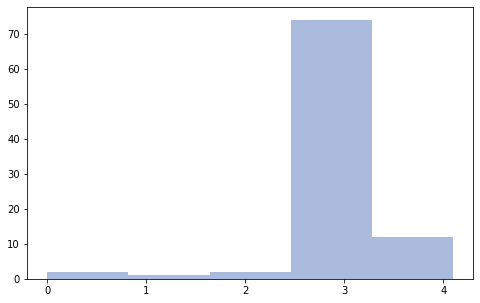

In [44]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
x = np.asarray(train.average_speed)
y = np.asarray(train.max_speed)
z = np.asarray(train.start_date_local)

plt.hist(x, bins=5,color='#aabbdd')


fig.show()

In [45]:
train.head(105)

,name,upload_id,type,distance,moving_time,average_speed,max_speed,total_elevation_gain,start_date_local,start_time,train
156,Morning Run,5.612485e+09,Run,6394.5,1855,3.447,5.500,5.9,2021-05-09,08:31:26,true
153,Morning Run,5.647839e+09,Run,5736.9,1834,3.128,5.400,10.5,2021-05-15,10:59:33,true
152,Morning Run,5.670992e+09,Run,5614.2,1881,2.985,7.200,11.7,2021-05-19,07:57:38,true
148,Morning Run,5.738731e+09,Run,6672.2,1996,3.343,6.100,16.8,2021-05-31,10:08:38,true
147,Morning Run,5.750643e+09,Run,5916.2,1662,3.560,6.300,14.3,2021-06-02,07:26:06,true
...,...,...,...,...,...,...,...,...,...,...,...
4,75 degrees😵‍💫,6.919910e+09,Run,7338.0,2245,3.269,5.103,41.8,2022-01-11,09:50:04,true
3,Lunch Run,6.931727e+09,Run,10336.0,3430,3.013,4.740,52.4,2022-01-13,12:09:17,true
2,Evening Run,6.943460e+09,Run,5436.0,1975,2.752,3.044,0.0,2022-01-15,19:23:41,true
1,Afternoon Run,6.949353e+09,Run,6538.7,2565,2.549,2.836,0.0,2022-01-16,14:18:48,true


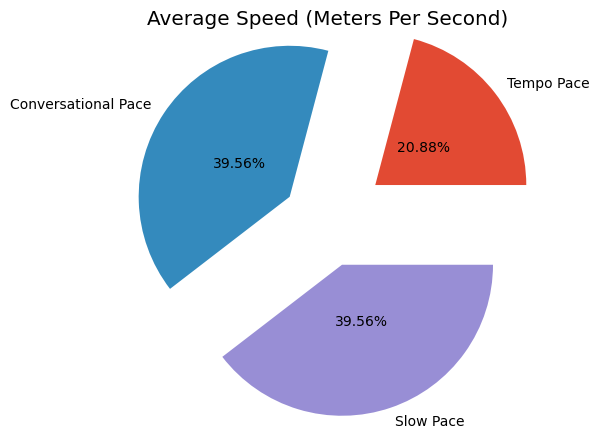

In [50]:
plt.figure(figsize=(8,5),dpi=100)
plt.style.use('ggplot')

tempo_pace = train.loc[train.average_speed > 3.2].count()[0]
conversational_pace = train[(train.average_speed <=3.2) & (train.average_speed > 2.9)].count()[0]
slow_pace = train[(train.average_speed < 2.9)].count()[0]

weights = [tempo_pace, conversational_pace, slow_pace]
label = ['Tempo Pace', 'Conversational Pace', 'Slow Pace']
explode = (.4,.3,.3)

plt.title('Average Speed (Meters Per Second)')

plt.pie(weights, labels=label,explode=explode,pctdistance=0.4,autopct = '%.2f%%')
plt.show()